# Question 1:

In [102]:
import pandas as pd
# reading csv files
data =  pd.read_csv('E:/Data-Engineering-Jacbos/Semester 2/Statistical Modeling/Project/SeoulBikeData.csv',encoding= 'unicode_escape')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [125]:
data1 = data

In [126]:
data1['Date'] =  pd.to_datetime(data1['Date'], dayfirst= True)

In [127]:
data1 = data1.set_index('Date')

In [131]:
data1.index

DatetimeIndex(['2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01',
               ...
               '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30',
               '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30',
               '2018-11-30', '2018-11-30'],
              dtype='datetime64[ns]', name='Date', length=8760, freq=None)

In [133]:
data1.index += pd.TimedeltaIndex(data1['Hour'], unit='h')

In [135]:
data1.index

DatetimeIndex(['2017-12-01 00:00:00', '2017-12-01 01:00:00',
               '2017-12-01 02:00:00', '2017-12-01 03:00:00',
               '2017-12-01 04:00:00', '2017-12-01 05:00:00',
               '2017-12-01 06:00:00', '2017-12-01 07:00:00',
               '2017-12-01 08:00:00', '2017-12-01 09:00:00',
               ...
               '2018-11-30 14:00:00', '2018-11-30 15:00:00',
               '2018-11-30 16:00:00', '2018-11-30 17:00:00',
               '2018-11-30 18:00:00', '2018-11-30 19:00:00',
               '2018-11-30 20:00:00', '2018-11-30 21:00:00',
               '2018-11-30 22:00:00', '2018-11-30 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq=None)

Text(0.5, 0, 'Time')

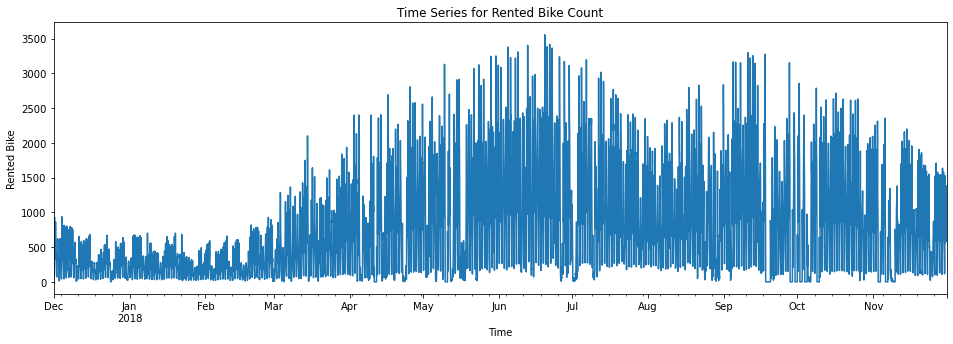

In [137]:
#data['Temperature(°C)'].plot()
plt.figure(figsize=(16, 5))
data1['Rented Bike Count'].plot()
plt.title('Time Series for Rented Bike Count')
plt.ylabel('Rented Bike')
plt.xlabel('Time')

Text(0.5, 0.97, 'Hourly Rented Bike')

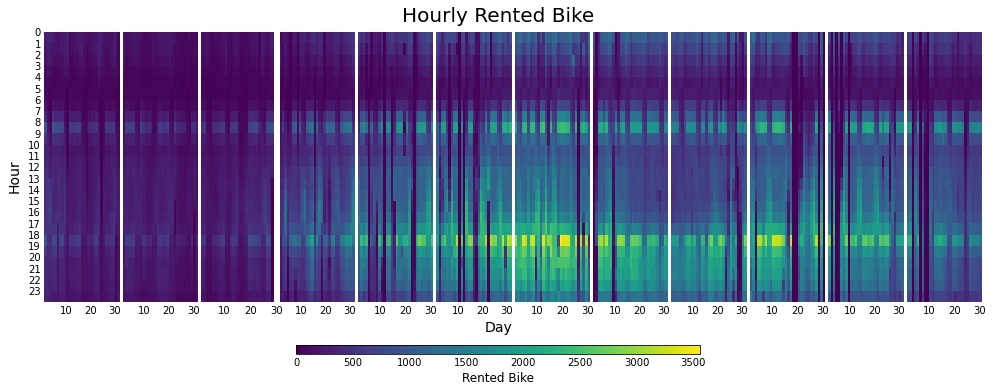

In [144]:
MIN_WS = data1['Rented Bike Count'].min() #edit!!
MAX_WS = data1['Rented Bike Count'].max() #edit!!

# Plotting heatmap for whole year 2006 for turbine 1

import matplotlib.colors as mc # For the legend

def single_plot (data, month, ax):
    data = data[data.index.month == month]
    hour = data.index.hour
    day = data.index.day
    WindSpeed = data['Rented Bike Count']
    #WindSpeed = WindSpeed.values.reshape(24, len(day.unique()), order="F")
    d = {'hour':hour, 'day':day, 'windspeed':WindSpeed}
    df = pd.DataFrame (data=d)
    WindSpeed = df.pivot_table(index="hour",columns="day",values="windspeed", aggfunc="mean")

    xgrid = np.arange(day.max() + 1) + 1
    ygrid = np.arange(25)
    
    ax.pcolormesh(xgrid, ygrid, WindSpeed, cmap="viridis", vmin=MIN_WS, vmax=MAX_WS)
    # Invert the vertical axis
    ax.set_ylim(24, 0)
    # Set tick positions for both axes
    ax.yaxis.set_ticks([i for i in range(24)])
    ax.xaxis.set_ticks([10, 20, 30])
    # Remove ticks by setting their length to 0
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # Remove all spines
    ax.set_frame_on(False)
    

fig, axes = plt.subplots(1, 12, figsize=(14, 5), sharey=True)

single_plot(data1, 12, axes[0])
for i in range(1,12):
    single_plot(data1, i, axes[i])
    
fig.subplots_adjust(left=0.05, right=0.98, top=0.9, hspace=0.08, wspace=0.04)

# Another utility for the legend
from matplotlib.cm import ScalarMappable

# First, let's make some room for the legend in the bottom.
fig.subplots_adjust(bottom=0.15)

# Create a new axis to contain the color bar
# Values are:
# (x coordinate of left border, 
#  y coordinate for bottom border,
#  width,
#  height)
cbar_ax = fig.add_axes([0.3, 0.005, 0.4, 0.025])

# Create a normalizer that goes from minimum to maximum wind speed
norm = mc.Normalize(MIN_WS, MAX_WS)

# Create the colorbar and set it to horizontal
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap="viridis"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "horizontal"
)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label
cb.set_label("Rented Bike", size=12)
#fig

# Set common labels for x and y axes
fig.text(0.5, 0.08, "Day", ha="center", va="center", fontsize=14)
fig.text(0.02, 0.5, 'Hour', ha="center", va="center", rotation="vertical", fontsize=14)

fig.suptitle("Hourly Rented Bike", fontsize=20, y=0.97)
#fig

In [98]:
data['Date'] =  pd.to_datetime(data['Date'], dayfirst= True)

In [101]:
data['Date'].day

AttributeError: 'Series' object has no attribute 'day'

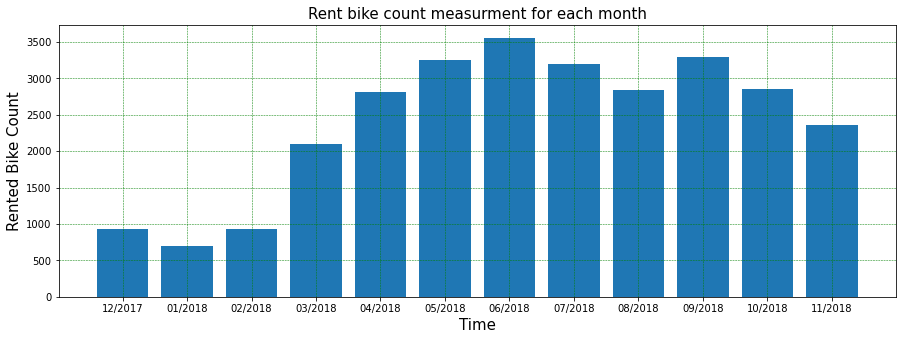

In [4]:
from matplotlib import pyplot as plt
import numpy as np

num_bins = 50
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(data['Date'].dt.strftime('%m/%Y'), data ["Rented Bike Count"])
  
ax.set_title('Rent bike count measurment for each month', fontsize = 15)
ax.set_ylabel('Rented Bike Count', fontsize = 15)
ax.set_xlabel('Time', fontsize = 15)
ax.grid(color = 'green', linestyle = '--', linewidth = 0.5)
                            
from scipy.stats import kurtosis
from scipy.stats import skew

kur = kurtosis(data['Rented Bike Count'])
skew = skew(data['Rented Bike Count'])
std = np.std(data['Rented Bike Count'])
mean = np.mean(data['Rented Bike Count'])

(17501.0, 17865.0)

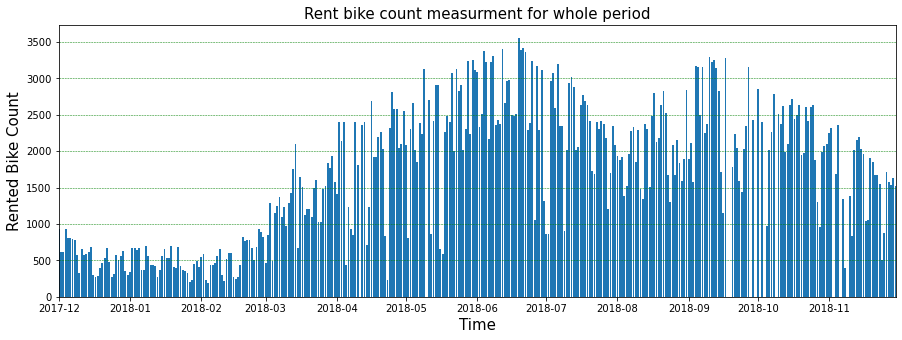

In [5]:
from matplotlib import pyplot as plt
import numpy as np

num_bins = 50
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(data['Date'], data ["Rented Bike Count"])
  
ax.set_title('Rent bike count measurment for whole period', fontsize = 15)
ax.set_ylabel('Rented Bike Count', fontsize = 15)
ax.set_xlabel('Time', fontsize = 15)
ax.grid(axis='y', color = 'green', linestyle = '--', linewidth = 0.5)
ax.set_xlim([min(data['Date']), max(data['Date'])])

Text(0.5, 0, '')

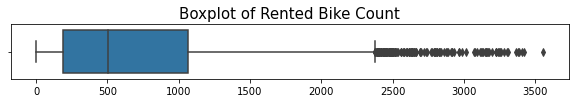

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,1))
sns.boxplot(data=data,x=data["Rented Bike Count"])
plt.title("Boxplot of Rented Bike Count", fontsize = 15)
ax.set_xlabel('')

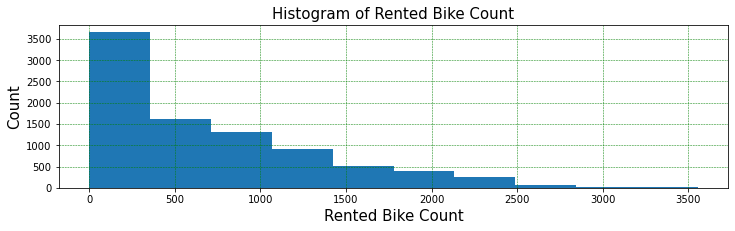

In [85]:
fig, ax = plt.subplots(figsize=(12,3))

num_bins = 10
ax.hist(data ["Rented Bike Count"])#,bins=num_bins)
  
ax.set_title('Histogram of Rented Bike Count',fontsize = 15)
ax.set_xlabel('Rented Bike Count', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.grid(color = 'green', linestyle = '--', linewidth = 0.5)

<br><br> 
# Question 2:

## Plotting the histogram and pmf 
## & Calculating mean, standard deviation, skewness and kurtosis

### 1. Temperature

Mean = 12.883
Standard deviation = 11.944
Kurtosis = -0.838
Skewness = -0.198


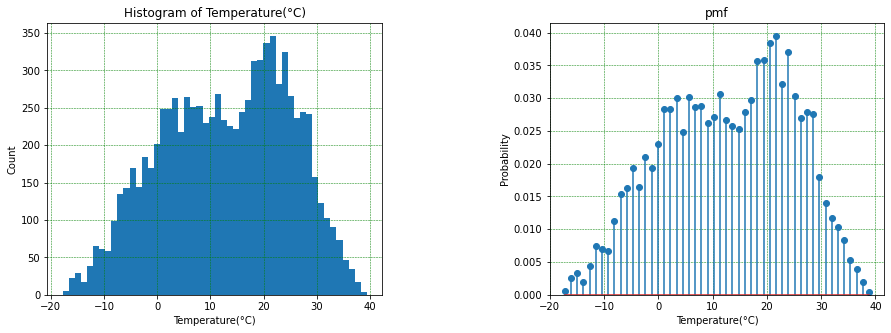

In [155]:
from matplotlib import pyplot as plt
import numpy as np

num_bins = 50
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.hist(data ["Temperature(°C)"],bins=num_bins)
  
ax1.set_title('Histogram of Temperature(°C)')
ax1.set_xlabel('Temperature(°C)')
ax1.set_ylabel('Count')
ax1.grid(color = 'green', linestyle = '--', linewidth = 0.5)

counts , bins = np.histogram(data ["Temperature(°C)"],bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
#print (probs.sum()) # 1.0
ax2.stem(bins, probs)
ax2.set_title('pmf')
ax2.set_xlabel('Temperature(°C)')
ax2.set_ylabel('Probability')
ax2.set_ylim(bottom=0)
ax2.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.subplots_adjust(wspace=0.5)

from scipy.stats import kurtosis
from scipy.stats import skew

kur = kurtosis(data['Temperature(°C)'])
skew = skew(data['Temperature(°C)'])
std = np.std(data['Temperature(°C)'])
mean = np.mean(data['Temperature(°C)'])

print ('Mean =',round(mean,3))
print ('Standard deviation =',round(std,3))
print ('Kurtosis =', round(kur,3))
print ('Skewness =',round(skew,3))

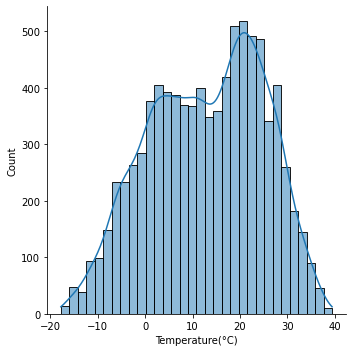

In [166]:
sns.displot(data ["Temperature(°C)"], kde=True)

In [159]:
num_bins = 50
counts , bins = np.histogram(data ["Temperature(°C)"],bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())

bins


array([-17.228, -16.084, -14.94 , -13.796, -12.652, -11.508, -10.364,
        -9.22 ,  -8.076,  -6.932,  -5.788,  -4.644,  -3.5  ,  -2.356,
        -1.212,  -0.068,   1.076,   2.22 ,   3.364,   4.508,   5.652,
         6.796,   7.94 ,   9.084,  10.228,  11.372,  12.516,  13.66 ,
        14.804,  15.948,  17.092,  18.236,  19.38 ,  20.524,  21.668,
        22.812,  23.956,  25.1  ,  26.244,  27.388,  28.532,  29.676,
        30.82 ,  31.964,  33.108,  34.252,  35.396,  36.54 ,  37.684,
        38.828])

In [160]:
samples = np.concatenate([bins.reshape((-1, 1)), probs.reshape((-1,1))], axis=-1)
samples.shape

(50, 2)

In [163]:
# Multimodal Gaussian Distribution

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, covariance_type = "full").fit(samples)
gm.means_

array([[ 2.35517961e+01,  2.32794123e-02],
       [-4.96800665e+00,  1.59449011e-02]])

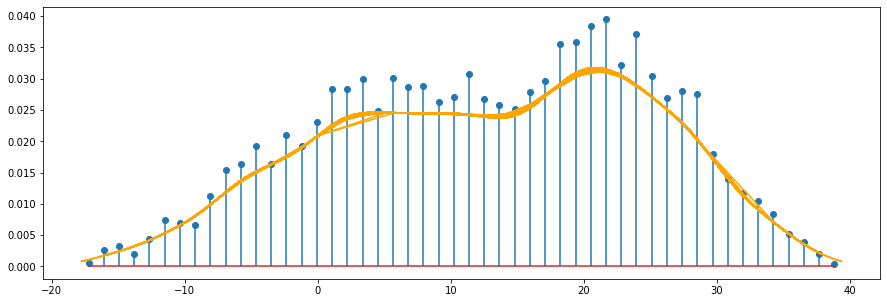

In [59]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
from scipy.stats import gaussian_kde


#kde = KDEMultivariate(data['Temperature(°C)'], var_type='c')
#kde = KDEUnivariate(data ["Temperature(°C)"])
#kde.fit()
kde = gaussian_kde(data ["Temperature(°C)"])#, bw_method=bandwidth / x.std(ddof=1), **kwargs)

    
num_bins = 50
fig, ax = plt.subplots(figsize=(15,5))
counts , bins = np.histogram(data ["Temperature(°C)"],bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
#print (probs.sum()) # 1.0
ax.stem(bins, probs)
#ax.plot(data['Temperature(°C)'],kde.pdf(data['Temperature(°C)']))
ax.plot(data['Temperature(°C)'],kde.evaluate(data['Temperature(°C)']), color='orange')



<br><br>
### 2. Wind Speed

Mean = 1.725
Standard deviation = 1.036
Kurtosis = 0.726
Skewness = 0.891


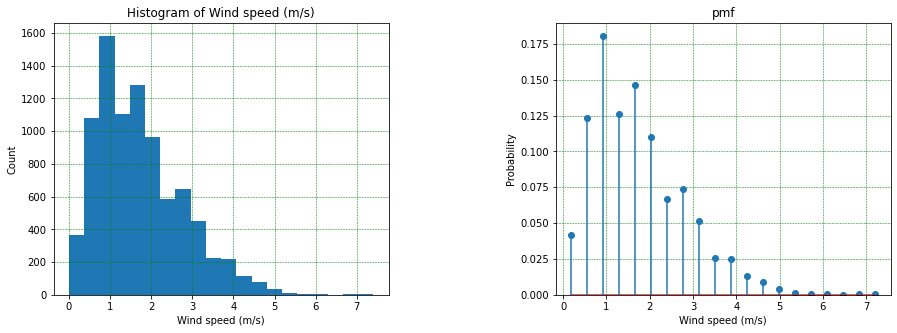

In [8]:
from matplotlib import pyplot as plt
import numpy as np

num_bins = 20
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.hist(data ["Wind speed (m/s)"],bins=num_bins)
  
ax1.set_title('Histogram of Wind speed (m/s)')
ax1.set_xlabel('Wind speed (m/s)')
ax1.set_ylabel('Count')
ax1.grid(color = 'green', linestyle = '--', linewidth = 0.5)

counts , bins = np.histogram(data ["Wind speed (m/s)"],bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
#print (probs.sum()) # 1.0
ax2.stem(bins, probs)
ax2.set_title('pmf')
ax2.set_xlabel('Wind speed (m/s)')
ax2.set_ylabel('Probability')
ax2.set_ylim(bottom=0)
ax2.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.subplots_adjust(wspace=0.5)

from scipy.stats import kurtosis
from scipy.stats import skew

kur = kurtosis(data['Wind speed (m/s)'])
skew = skew(data['Wind speed (m/s)'])
std = np.std(data['Wind speed (m/s)'])
mean = np.mean(data['Wind speed (m/s)'])

print ('Mean =',round(mean,3))
print ('Standard deviation =',round(std,3))
print ('Kurtosis =', round(kur,3))
print ('Skewness =',round(skew,3))

<br><br><br><br><br><br><br><br><br><br>
## Finding similar distribution function

### 1. Temperature

,sumsquare_error,aic,bic,kl_div
norm,0.003099,877.975595,-130108.858862,0.046619
lognorm,0.003196,881.856479,-129830.028750,0.048035
gamma,0.003235,880.536255,-129724.134896,0.048740
chi2,0.003407,881.244654,-129270.380649,0.051310
cauchy,0.007611,918.727547,-122237.002613,0.125572


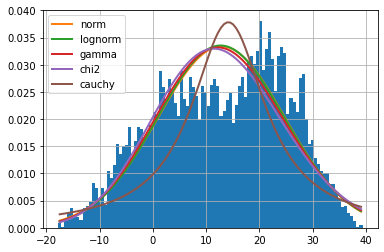

In [9]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(data['Temperature(°C)'],
           distributions= get_common_distributions(),
          timeout=60)
f.fit()
f.summary()

From the result, we can see that the normal distribution function is the closest function to the temperature data based on minimum sum squared error. <br>Now, let's calculate the fitted function parameters:

In [10]:
print ('Normal distribution function parameters:', f.fitted_param['norm'])

Normal distribution function parameters: (12.882922374429223, 11.94414342830759)


Now, let's check the properties of the model normal distribution function:

In [11]:
import math
from scipy.stats import norm
mean, var, skew, kurt = norm.stats(f.fitted_param['norm'][0],f.fitted_param['norm'][1],moments='mvsk')
print('Mean =',np.around(mean, decimals = 3))
print('Standard deviation =', np.around(math.sqrt(var), decimals = 3))
print('Skewness =', skew)
print ('Kurtosis =', kurt)

Mean = 12.883
Standard deviation = 11.944
Skewness = 0.0
Kurtosis = 0.0


<br><br><br><br><br><br><br><br>
### 2. Wind Speed

,sumsquare_error,aic,bic,kl_div
gamma,1.460935,671.954482,-76174.905972,inf
lognorm,1.467644,651.469159,-76134.771934,inf
rayleigh,1.539324,801.391173,-75726.128070,inf
exponpow,1.685653,963.966348,-74921.559551,inf
norm,1.784137,983.127172,-74433.228334,inf


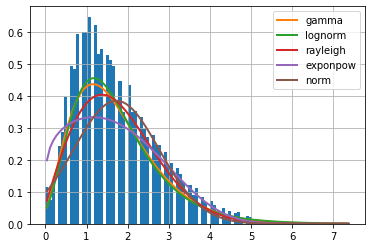

In [12]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(data['Wind speed (m/s)'],
           distributions= get_common_distributions(),
          timeout=60)
f.fit()
f.summary()

From the result, we can see that the gamma distribution function is the closest function to the wind speed data based on minimum sum squared error. <br>Now, let's calculate the fitted function parameters:

In [13]:
print ('Gamma function parameters :', f.fitted_param['gamma'])

Gamma function parameters : (3.3976821182115575, -0.21004385628604139, 0.5694913293182653)


Now, let's check the properties of the model gamma function:

In [14]:
from scipy.stats import gamma

mean, var, skew, kurt = gamma.stats(f.fitted_param['gamma'][0],f.fitted_param['gamma'][1],f.fitted_param['gamma'][2]
                                    , moments='mvsk')
print('Mean =', np.around(mean, decimals = 3))
print('Standard deviation =', np.around(math.sqrt(var), decimals = 3))
print('Skewness =', np.around(skew, decimals = 3))
print ('Kurtosis =', np.around(kurt, decimals = 3))

Mean = 1.725
Standard deviation = 1.05
Skewness = 1.085
Kurtosis = 1.766


<br><br><br><br><br><br><br><br><br><br>

# PSM - HW 6
## Ali Afsharian

## Question 1:

I choose 'Temperature' and 'Wind Speed' features.
<br>Here RV function is the procedure of measuring climate data, particularly Temperature and Wind Speed.
<br>For Temperature we have: Temperature (℃) → S_1 = [-17.8 ,39.4] 
<br>For Wind Speed we have: Wind Speed (m/s) → S_2 = [0,7.4] 
<br>So the DVS would be: DVS{S_1, S_2} → S = S_1 ⊗ S_2

Text(0.5, 1.1, 'Scatter Plot for Temprature and Wind Speed')

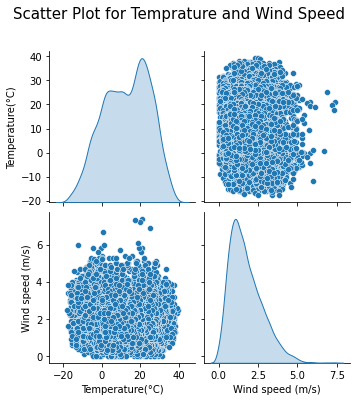

In [15]:
import seaborn as sns

# Scatter plot for Temperature and Wind Speed
sns.pairplot(data, diag_kind='kde',vars=['Temperature(°C)','Wind speed (m/s)']) 
plt.suptitle('Scatter Plot for Temprature and Wind Speed', y = 1.1, fontsize = 15)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

Text(0.5, 1, 'Scatter Plot for all features')

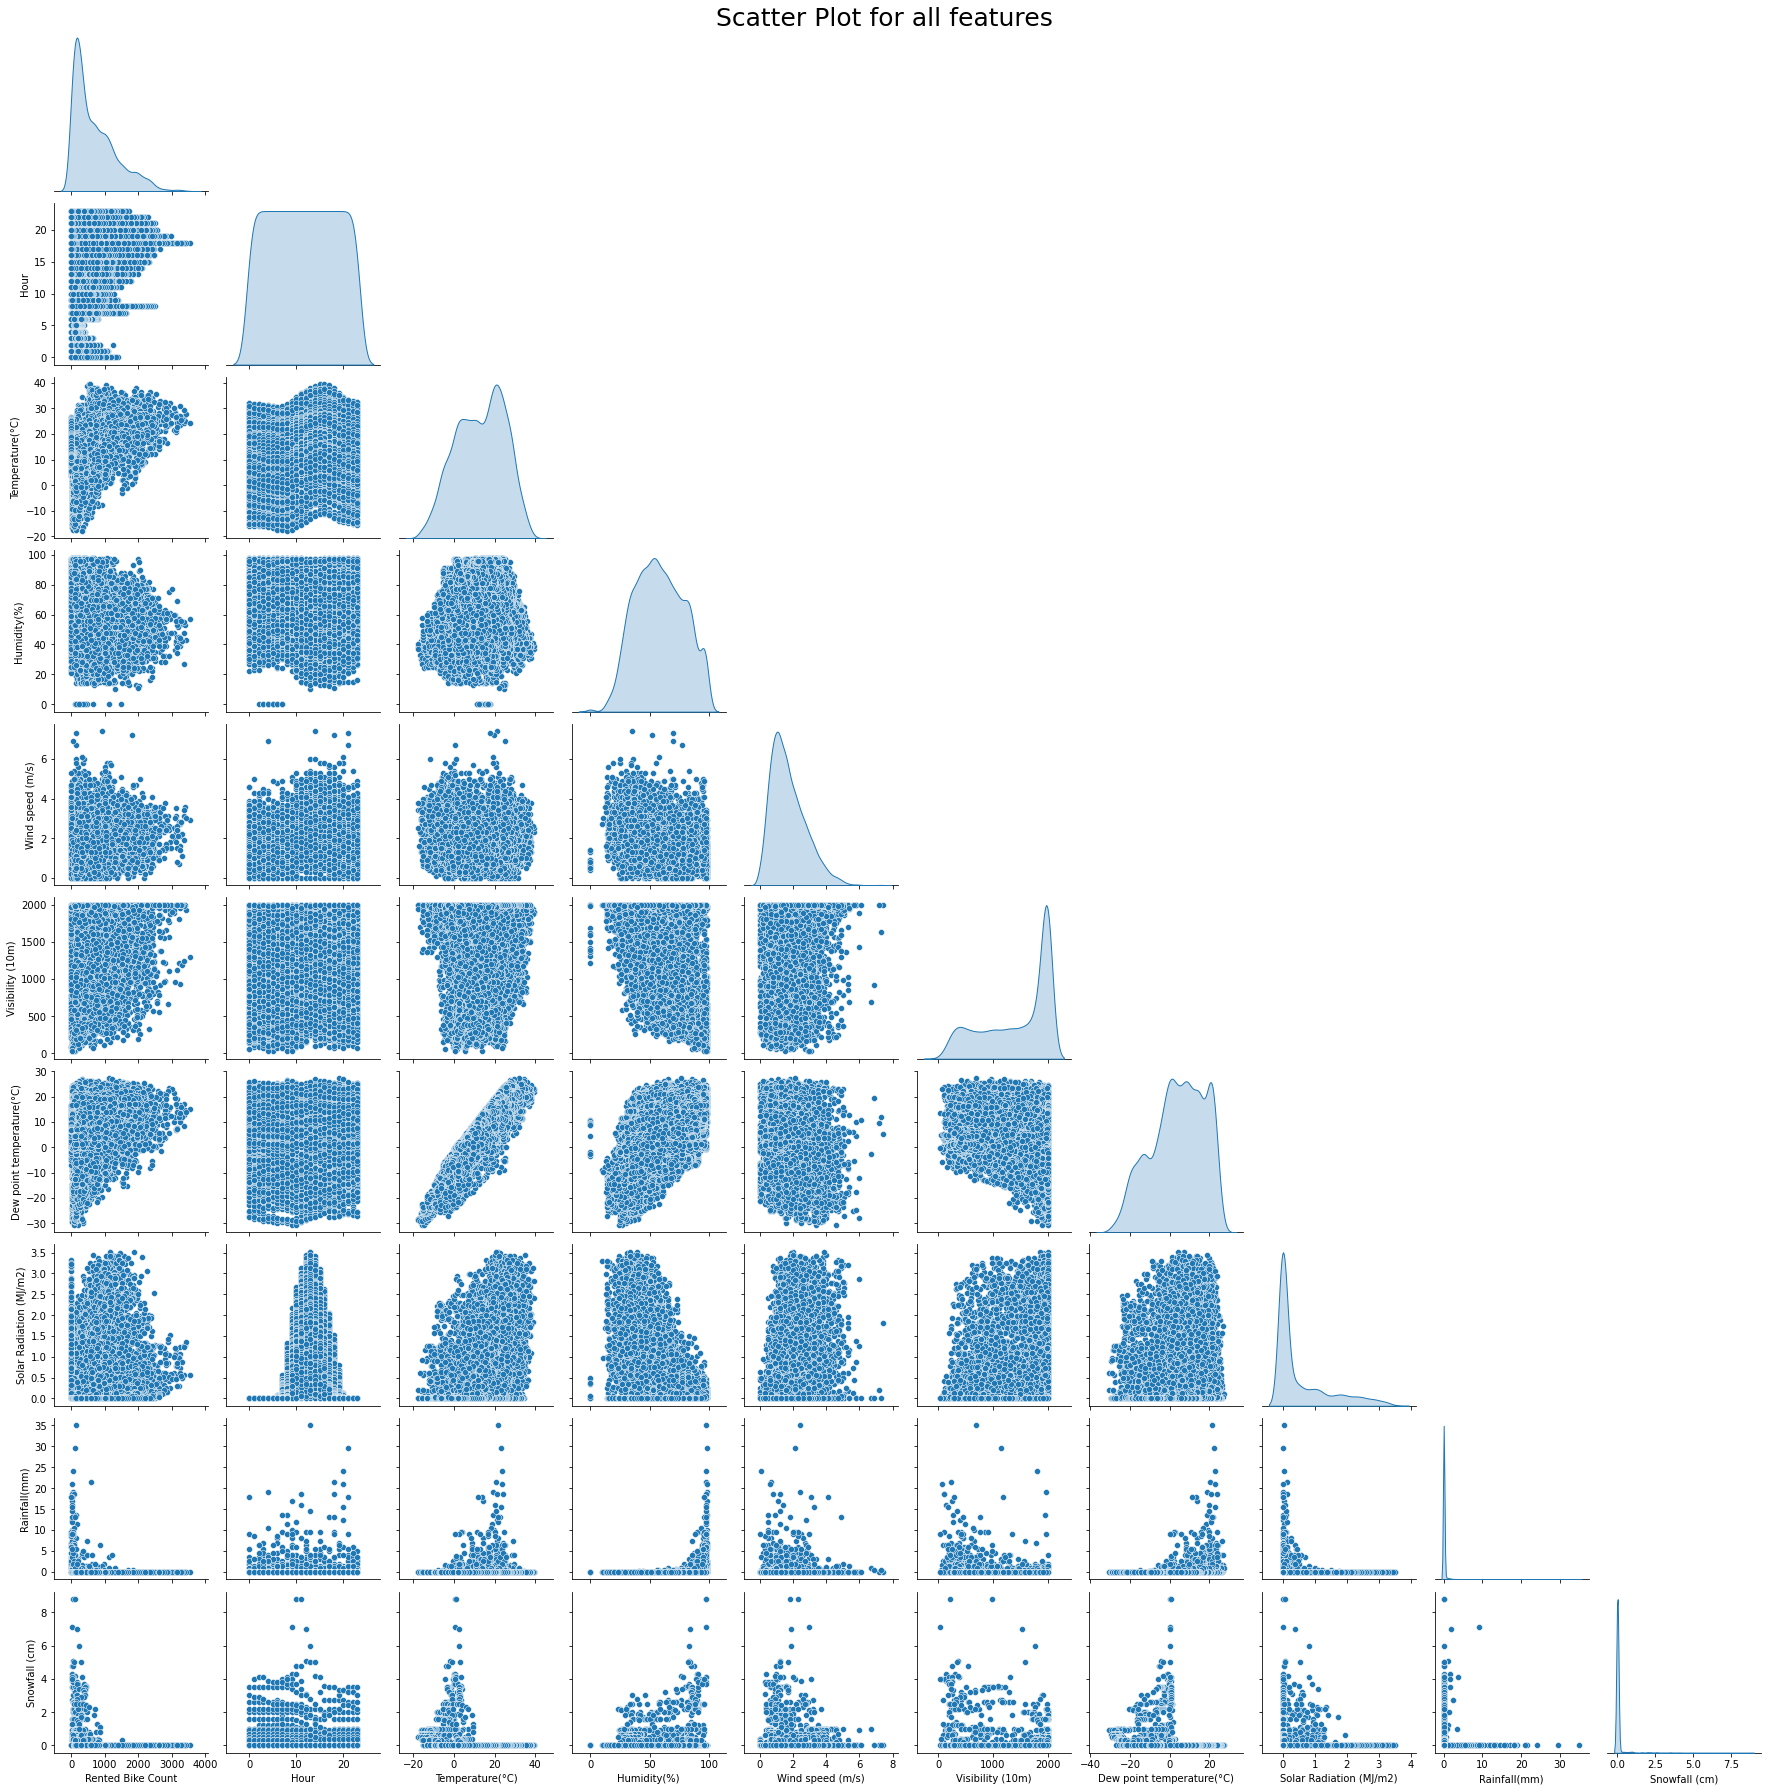

In [16]:
# Scatter plot for all features
import seaborn as sns
sns.pairplot(data, diag_kind='kde', corner=True)
plt.suptitle('Scatter Plot for all features', y = 1, fontsize = 25)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

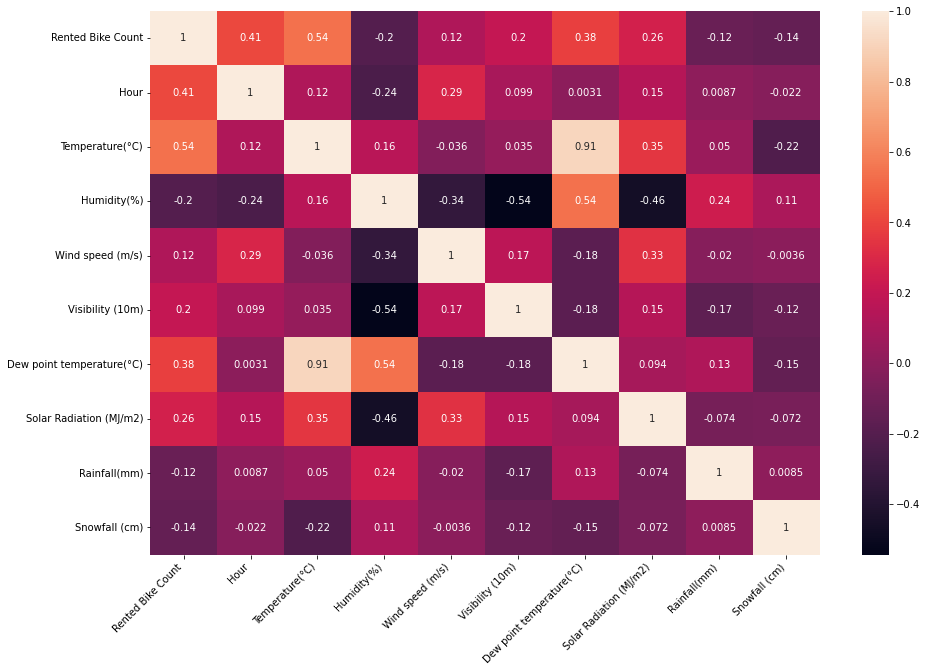

In [17]:
# Correlation Matrix based on Pearson method
import seaborn as sns
corrMatrix = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,10))
corrChart = sns.heatmap(corrMatrix, annot=True)
corrChart.set_xticklabels(corrChart.get_xticklabels(), rotation=45, horizontalalignment='right')
None

From the scatter plot for 'Temperature' and 'Wind Speed', we can see that these two features have not a strong correlation.
<br>Also, by looking at the correlation matrix, they have a small negative correlation with the <b>Pearson correlation coefficien = - 0.036</b>.
<br>We can conclude that they are <b>anticorrelated</b>.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## Question 2:

### Plotting joint pmf

In [18]:
# Calculate joint pmf for Temperature and Wind Speed
    # Round the temperature and wind speed to map on the a discrete S with interval width d=1
    
t = np.array(round(data['Temperature(°C)']), dtype=object)
w = np.array(round(data['Wind speed (m/s)']), dtype=object)

# Build crosstab to find the frequency of each temperature and wind speed measurement 
cnt = pd.crosstab(t, w, rownames=['Temperature(°C)'], colnames=['Wind speed (m/s)'])
# Calculate probability based on frequency
cnt = cnt / cnt.values.sum()

#cnt

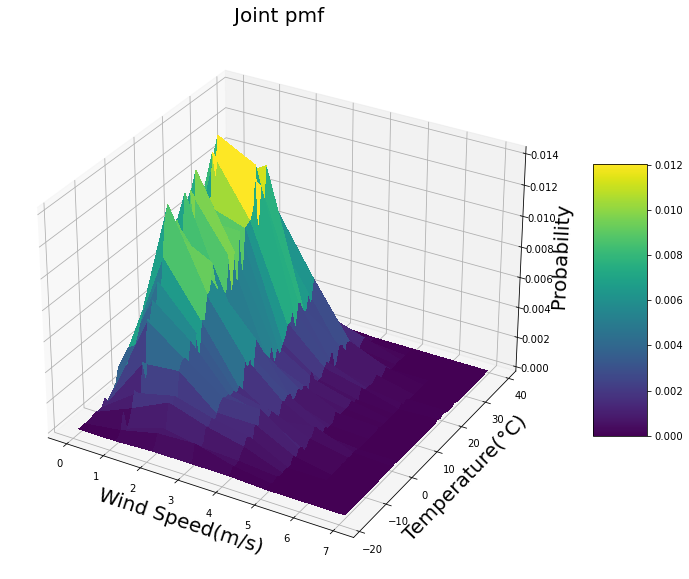

In [49]:
# 3D plot of joint pmf
x = np.linspace(0,7,8)
y = np.linspace(-18,39,58)

X, Y = np.meshgrid(x,y)

#Make a 3D plot

fig, ax = plt.subplots(figsize=(15,10),subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, cnt, cmap='viridis', linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('Wind Speed(m/s)',fontsize = 20)
ax.set_ylabel('Temperature(°C)',fontsize = 20)
ax.set_zlabel('Probability',fontsize = 20)
ax.set_title('Joint pmf', fontsize = 20)

#from matplotlib import cm
#cset = ax.contour(X, Y, cnt, zdir='z', offset=-0.5, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, cnt, zdir='x', offset=0, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, cnt, zdir='y', offset=45, cmap=cm.coolwarm)

plt.show()

### Marginal and conditional probability

In [27]:
# Calculate marginal distributions
marginal_wind = []
marginal_temp = []

for i in range(0,8):
    marginal_wind.append(cnt[i].sum())

for i in range(-18,40):
    marginal_temp.append(cnt.loc[i,:].sum())

In [192]:
independenceMatrix = np.empty([58,8])

Text(0.5, 0.92, 'Joint pmf')

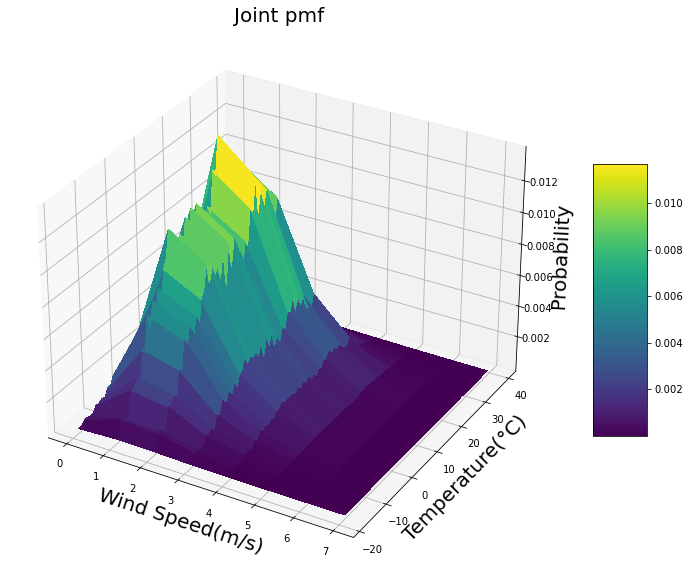

In [201]:
for i in range(58):
    for j in range(8):
        independenceMatrix [i][j]= marginal_wind[j] * marginal_temp[i]
        
#Make a 3D plot

fig, ax = plt.subplots(figsize=(15,10),subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, independenceMatrix, cmap='viridis', linewidth=0, antialiased=False)
#ax.plot(x, 0, marginal_wind,zdir='y')

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('Wind Speed(m/s)',fontsize = 20)
ax.set_ylabel('Temperature(°C)',fontsize = 20)
ax.set_zlabel('Probability',fontsize = 20)
ax.set_title('Joint pmf', fontsize = 20)

#from matplotlib import cm
#cset = ax.contour(X, 0, marginal_wind, zdir='y', offset=45, cmap=cm.coolwarm)

In [237]:
dif = 0
for i in range(58):
    for j in range(8):
        dif = cnt_resin [j][i] - independenceMatrix [i][j]
dif

-2.606284272638185e-07

In [233]:
independenceMatrix [50][1]

0.00432252246617043

In [236]:
i=57
j=7
cnt_resin [3][57]

0.00011415525114155251

In [217]:
cnt_resin

Wind speed (m/s),0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
0,0.000000,0.000000,0.000114,0.000114,0.000114,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000228,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000342,0.000913,0.001027,0.000342,0.000000,0.000000,0.000000
3,0.000000,0.001370,0.000913,0.000457,0.000228,0.000000,0.000000,0.000000
4,0.000000,0.000114,0.000913,0.000457,0.000342,0.000114,0.000000,0.000000
5,0.000114,0.000457,0.000685,0.000571,0.000685,0.000000,0.000000,0.000000
6,0.000114,0.001142,0.002283,0.001484,0.000913,0.000000,0.000114,0.000000
7,0.000114,0.002169,0.000913,0.001370,0.001370,0.000114,0.000000,0.000000
8,0.000114,0.001826,0.002397,0.001712,0.001256,0.000000,0.000000,0.000000
9,0.000571,0.001142,0.001370,0.001256,0.000571,0.000000,0.000000,0.000000


In [28]:
cnt_resin = cnt.reset_index(drop=True)
#cnt_resin

In [29]:
# Calculate conditional probability for temperature conditioned by wind speed = 3
con_t_w3 = cnt_resin.loc[:,3]/marginal_wind[3]
#con_t_w3

Text(0.5, 1.0, 'Marginal and Conditional probability for Temperature and Temperature conditioned by Wind Speed = 3')

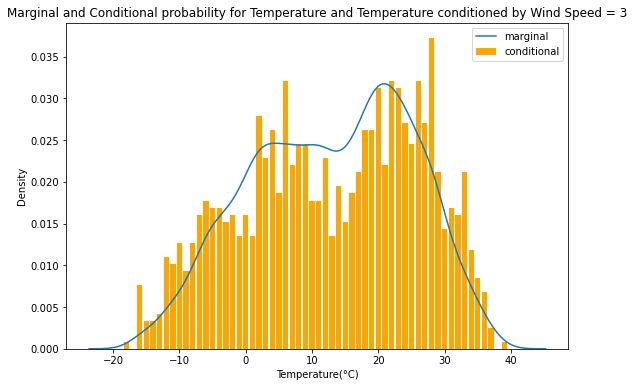

In [31]:
# Plotting marginal and conditional density
    # temperature marginal compared with temperature conditioned by wind speed = 3
T = np.linspace(-18,39,58)

plt.figure(figsize=(9, 6))
sns.kdeplot(data['Temperature(°C)'])
#plt.stem(T, con_t_w3, linefmt='orange', markerfmt='orange', basefmt='orange')
plt.bar(T,con_t_w3, color='orange')
plt.legend(['marginal', 'conditional'])
plt.title('Marginal and Conditional probability for Temperature and Temperature conditioned by Wind Speed = 3')

Text(0.5, 1.0, 'Marginal and Conditional probability for Temperature and Temperature conditioned by Wind Speed = 3')

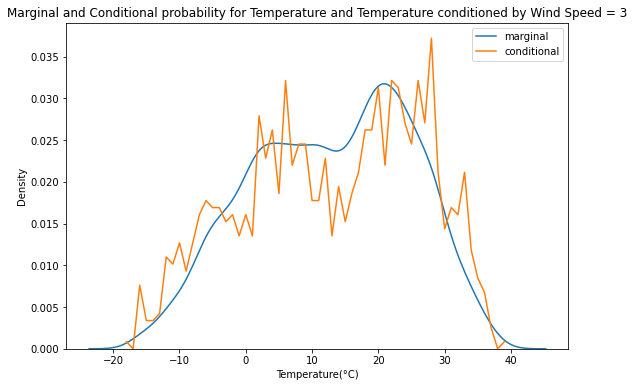

In [36]:
# Plotting marginal and conditional density
    # temperature marginal compared with temperature conditioned by wind speed = 3
T = np.linspace(-18,39,58)

plt.figure(figsize=(9, 6))
sns.kdeplot(data['Temperature(°C)'])
plt.plot(T, con_t_w3)
plt.legend(['marginal', 'conditional'])
plt.title('Marginal and Conditional probability for Temperature and Temperature conditioned by Wind Speed = 3')

<br>By fitting a polynomial regression model with degree = 7 to conditional probability, we can have a more clear camparison: 

(0.0, 0.03336522776485622)

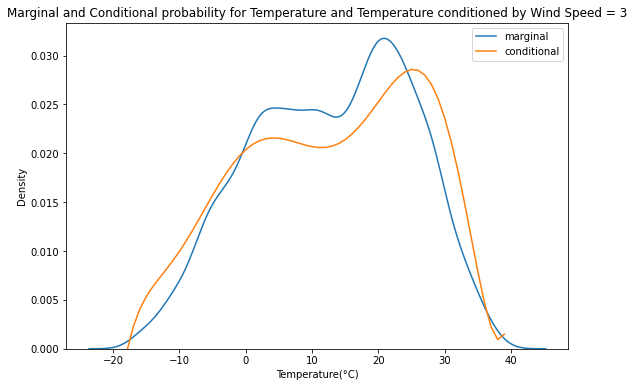

In [22]:
# Plotting marginal and conditional density
    # temperature marginal compared with temperature conditioned by wind speed = 3
model_t = np.poly1d(np.polyfit(T, con_t_w3, 7))

plt.figure(figsize=(9, 6))
sns.kdeplot(data['Temperature(°C)'])
plt.plot(T,model_t(T))
plt.legend(['marginal', 'conditional'])
plt.title('Marginal and Conditional probability for Temperature and Temperature conditioned by Wind Speed = 3')
plt.ylim(bottom=0)

<br> By looking at the results, we can say that the density for Temperature conditioned by Wind Speed = 3 has almost the same pattern as Temperature marginal density with a little difference in amounts.

In [33]:
# Calculate conditional probability for temperature conditioned by wind speed = 5
con_t_w5 = cnt_resin.loc[:,5]/marginal_wind[5]
#con_t_w5

Text(0.5, 1.0, 'Marginal and Conditional probability for Temperature and Temperature conditioned by Wind Speed = 5')

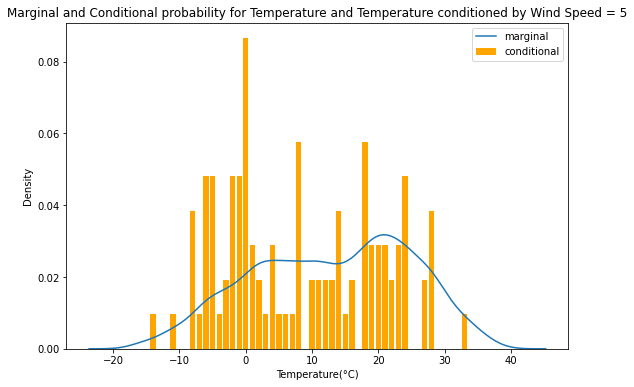

In [34]:
# Plotting marginal and conditional density
    # temperature marginal compared with temperature conditioned by wind speed = 5
T = np.linspace(-18,39,58)

plt.figure(figsize=(9, 6))
sns.kdeplot(data['Temperature(°C)'])
#plt.plot(T, con_t_w5)
plt.bar(T,con_t_w5, color='orange')
plt.legend(['marginal', 'conditional'])
plt.title('Marginal and Conditional probability for Temperature and Temperature conditioned by Wind Speed = 5')

In [63]:
cnt_new = pd.crosstab(t, w, rownames=['Temperature(°C)'], colnames=['Wind speed (m/s)'])
cnt_new_res_in = cnt_new.reset_index(drop=True)
con_t_w5_new = cnt_new_res_in.loc[:,5]
#con_t_w5_new

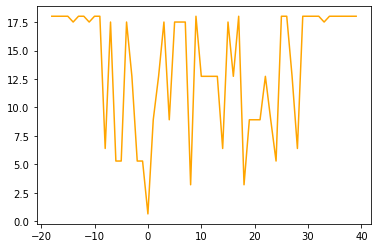

In [68]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(con_t_w5_new)#, bw_method=bandwidth / x.std(ddof=1), **kwargs)

plt.plot(T,kde.evaluate(con_t_w5_new)/marginal_wind[5], color='orange')

(0.0, 0.040141835021273775)

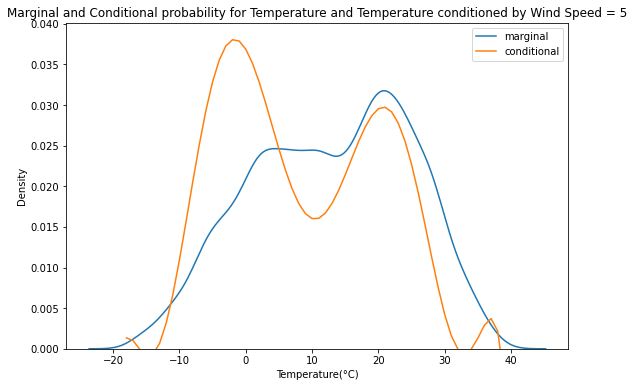

In [38]:
# Plotting marginal and conditional density
    # temperature marginal compared with temperature conditioned by wind speed = 5
T = np.linspace(-18,39,58)
model_t2 = np.poly1d(np.polyfit(T, con_t_w5,8))

plt.figure(figsize=(9, 6))
sns.kdeplot(data['Temperature(°C)'])
plt.plot(T,model_t2(T))
plt.legend(['marginal', 'conditional'])
plt.title('Marginal and Conditional probability for Temperature and Temperature conditioned by Wind Speed = 5')
plt.ylim(bottom=0)

For the density of Temperature conditioned by Wind Speed = 5 compared to the Temperature marginal density, we can not see the similar pattern like the previous one. Here there is much more difference between patterns as well as the probability amounts.

### 2-variate Gaussian distribution

<br>In the following, the covariance matrix and means are calculated:

In [48]:
# Caculate Covariance Matrix
m = np.array([data['Wind speed (m/s)'],data['Temperature(°C)']])
#m
arr_cov = np.cov(m)
print ('Covariance Matrix: \n', np.around(arr_cov,3))


Covariance Matrix: 
 [[  1.074  -0.449]
 [ -0.449 142.679]]


In [45]:
# Calculate mean
arr_mean = np.array([data['Wind speed (m/s)'].mean(),data['Temperature(°C)'].mean()])
print ('Means Array: \n', arr_mean)
print ('\nMean for Wind Speed =', round(arr_mean[0],3))
print ('Means for Temperature =', round(arr_mean[1],3))

Means Array: 
 [ 1.72490868 12.88292237]

Mean for Wind Speed = 1.725
Means for Temperature = 12.883


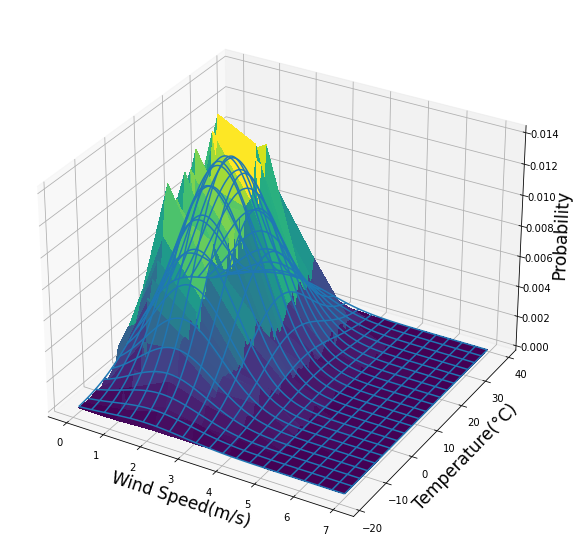

In [78]:
from scipy.stats import multivariate_normal
# Generating a Gaussian bivariate distribution
# with given mean and covariance matrix
random_seed=1000

mean = arr_mean
cov = arr_cov
distr = multivariate_normal(cov = cov, mean = mean, seed = random_seed)
     
# Generating a meshgrid complacent with
mean_1, mean_2 = mean[0], mean[1]
sigma_1, sigma_2 = cov[0,0], cov[1,1]
     

x = np.linspace(0,7,200)
y = np.linspace(-18,39,200)

X, Y = np.meshgrid(x,y)

x1 = np.linspace(0,7,8)
y1 = np.linspace(-18,39,58)
X1, Y1 = np.meshgrid(x1,y1)

     
    # Generating the density function
    # for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     

fig, ax = plt.subplots(figsize=(15,10),subplot_kw={"projection": "3d"})

ax.plot_surface(X1, Y1, cnt,cmap='viridis',linewidth=0,antialiased=False)
ax.plot_wireframe(X, Y, pdf, rstride=10, cstride=10)

ax.set_xlabel('Wind Speed(m/s)', fontsize = 17)
ax.set_ylabel('Temperature(°C)', fontsize = 17)
ax.set_zlabel('Probability', fontsize = 17)

#ax.elev = 30
#ax.azim = 70

plt.show()

Now, I am going to calculate Mean Squared Error for the Gaussian destribution function to have a better understanding of its performance:

# calculating MSE is wrong because probability is already a small value!

In [30]:
mse=0
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        mse += (distr.pdf([X1[i,j], Y1[i,j]]) - cnt_resin[j][i])**2
        
mse = mse / (X1.shape[0]*X1.shape[1])
print ('MSE =', mse)

MSE = 2.090691626114028e-06


From the 3D plot above and caculated MSE, we can conclude that the Gausian distribution is a good model for these two features.

# IQR -> interquartile range (spread of data)

In [ ]:
    from mpl_toolkits.mplot3d import Axes3D
    ax = Axes3D(fig)
    ax.scatter(xx,yy,zz, marker='o', s=20, c="goldenrod", alpha=0.6)
    for ii in xrange(0,360,1):
        ax.view_init(elev=10., azim=ii)
        savefig("movie%d.png" % ii)